# Reinforcement Learning

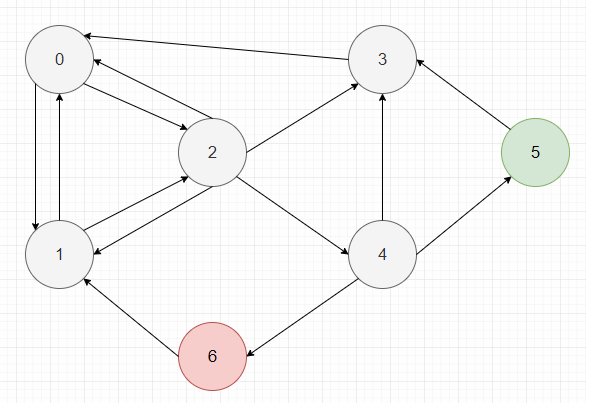

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

reward_tab=[
[-1,0,0,-1,-1,-1,-1],
[0,-1,0,-1,-1,-1,-1],
[0,0,-1,0,0,-1,-1],
[0,-1,-1,-1,-1,-1,-1],
[-1,-1,-1,0,-1,100,-20],
[-1,-1,-1,-1,-1,-1,-1],
[-1,0,-1,-1,-1,-1,-1]]

reward_table = np.array(reward_tab)




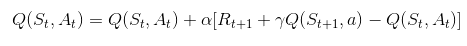

In [10]:
class Draw():
    def draw_q(self):
        print("Q")
        for i in self.q_table:
            for j in i:
                print(int(j),"\t",end=' ')
            print("")
                
    def draw_r(self):
        print("R")
        for i in self.reward_table:
            for j in i:
                print(int(j),"\t",end=' ')
            print("")
            
            
class RoadFind():
    def __init__(self,reward_table,goal_node,gamma=0.8,learning_rate=0.7,iteration=1000):
        self.q_table=np.zeros((len(reward_table),len(reward_table)))
        self.reward_table=reward_table
        self.goal_node=goal_node
        self.gamma=gamma 
        self.l_r=learning_rate
        self.iter=iteration
        self.Move()
        Draw.draw_q(self)
        Draw.draw_r(self)
            
    def Move(self,y_index=-1):
        if y_index == -1:
            y_index=round(random.uniform(0,len(self.reward_table)-1))
            while int(y_index) == int(self.goal_node):
                y_index=round(random.uniform(0,len(self.reward_table)-1))
        error_count=0
        x_index=round(random.uniform(0,len(self.q_table[y_index])-1))
        
        while self.reward_table[y_index][x_index] == -1 and error_count != 100:
            x_index=round(random.uniform(0,len(self.q_table[y_index])-1))
            
            
            
        if error_count == 100:
            print("there are not edge at node")
        else:
            self.q_table[y_index,x_index]+=self.reward_table[y_index][x_index]+self.l_r*(\
            self.gamma*self.q_table[x_index,np.argmax(self.q_table[x_index])]-\
            self.q_table[y_index,x_index])

            if self.iter>1:
                self.iter-=1
                #Draw.draw_q(self)
                #Draw.draw_r(self)
                self.Move(x_index if x_index!=self.goal_node else -1)
            


RoadFind(reward_table,5,iteration=100)






Q
0 	 72 	 90 	 0 	 0 	 0 	 0 	 
72 	 0 	 90 	 0 	 0 	 0 	 0 	 
72 	 72 	 0 	 54 	 113 	 0 	 0 	 
71 	 0 	 0 	 0 	 0 	 0 	 0 	 
0 	 0 	 0 	 0 	 0 	 142 	 0 	 
0 	 0 	 0 	 0 	 0 	 0 	 0 	 
0 	 65 	 0 	 0 	 0 	 0 	 0 	 
R
-1 	 0 	 0 	 -1 	 -1 	 -1 	 -1 	 
0 	 -1 	 0 	 -1 	 -1 	 -1 	 -1 	 
0 	 0 	 -1 	 0 	 0 	 -1 	 -1 	 
0 	 -1 	 -1 	 -1 	 -1 	 -1 	 -1 	 
-1 	 -1 	 -1 	 0 	 -1 	 100 	 -20 	 
-1 	 -1 	 -1 	 -1 	 -1 	 -1 	 -1 	 
-1 	 0 	 -1 	 -1 	 -1 	 -1 	 -1 	 
